ΙΩΑΝΝΗΣ ΓΙΑΝΝΑΚΟΣ 4970

MRR: 0.0988
HR@1: 0.0000
HR@2: 0.0549
HR@3: 0.0709
HR@4: 0.0732
HR@5: 0.0961
HR@6: 0.1144
HR@7: 0.1396
HR@8: 0.1533
HR@9: 0.1693
HR@10: 0.1808
HR@11: 0.1808
HR@12: 0.1899
HR@13: 0.1945
HR@14: 0.2082
HR@15: 0.2197
HR@16: 0.2243
HR@17: 0.2334
HR@18: 0.2380
HR@19: 0.2426
HR@20: 0.2471


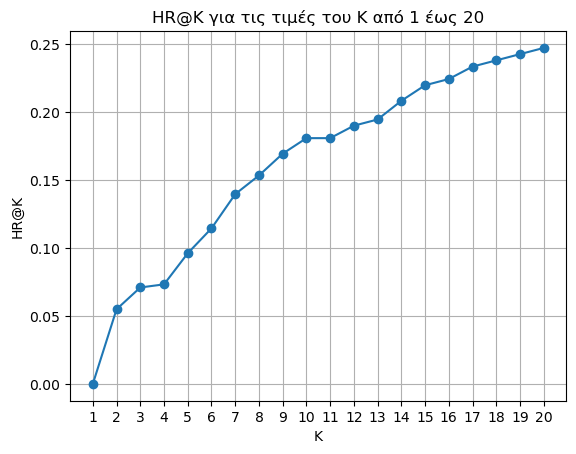

In [115]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


train_data = [] # Δημιουργία λίστας όπου θα αποθηκεύω τα ζεύγη απο το train 
test_data = [] # Δημιουργία λίστας όπου θα αποθηκεύω τα ζεύγη απο το test 

# Διάβασμα των δύο αρχείων 
with open('graph_train_data.txt', 'r') as f:
    for line in f:
        # Χωρίζουμε κάθε γραμμή σε ζεύγη reviewerID και asin
        reviewerID, asin = line.strip().split()
        
        # Προσθήκη του ζεύγους στη λίστα train_data
        train_data.append((reviewerID, asin))

with open('graph_test_data.txt', 'r') as f:
    for line in f:
        # Χωρίζουμε κάθε γραμμή σε ζεύγη reviewerID και asin
        reviewerID, asin = line.strip().split()
        
        # Προσθήκη του ζεύγους στη λίστα train_data
        test_data.append((reviewerID, asin))

# Δημιουργία διμερούς γραφήματος χρησιμοποιώντας δεδομένα από train αρχείο 
G = nx.Graph()
G.add_edges_from(train_data)


# Υπολογισμός personalized pagerank για κάθε χρήστη στα test δεδομένα
personalized_pageranks = {}
for reviewerID, asin in test_data:
    
    # Αρχικοποίηση του personalized pagerank με τις αρχικές τιμές
    personalized_pagerank = {reviewerID: 1.0}
    
    # Υπολογισμός personalized pagerank
    p_pagerank = nx.pagerank(G, alpha=0.85, personalization=personalized_pagerank, nstart=personalized_pagerank)
    
    # Ταξινόμηση βάσει του personalized pagerank
    sorted_pagerank = sorted(p_pagerank.items(), key=lambda x: x[1], reverse=True)
    
    # Φιλτράρισμα των γειτόνων του χρήστη στο γράφημα
    # Αφαίρεση των προιόντων που έχει αγοράσει ο χρήστης (δλδ τους γείτονες)
    sorted_not_neighbors = [node for node in sorted_pagerank if node[0] not in G.neighbors(reviewerID)]
    
    # Παίρνω μόνο τα asins απο το λεξικό που δημιούργησε ο ταξινομημένος αλγόριθμος pagerank
    asins_list = [node for node in sorted_not_neighbors if node[0].startswith('B')]
    
    
    # Υπολογισμός MRR και HR@K
    MRR = 0
    HR = np.zeros(20)
    for reviewerID, asin in test_data:
        
        # Εύρεση των θέσεων των asin στο ranking
        position = []
        for i, node in enumerate(asins_list, 1):
            if node[0] == asin:
                position.append(i)
                break
        
        # Υπολογισμός MRR και HR@K
        if position:
            MRR += 1 / position[0]
            
            for i in range(0,20):
                if position[0] <= i:
                    HR[i] += 1


    # Υπολογισμός του MRR
    MRR /= len(test_data)

    # Υπολογισμός του HR@K
    HR  /= len(test_data)
    
# Εκτύπωση των αποτελεσμάτων
print(f'MRR: {MRR:.4f}')
for k in range(20):
    print(f'HR@{k + 1}: {HR[k]:.4f}')

# Τιμές του K
K_values = range(1, 21)

# Εμφάνιση του γραφήματος HR@K ως προς το K
plt.plot(K_values, HR, marker='o')
plt.title('HR@K για τις τιμές του K από 1 έως 20') # τίτλος γραφήματος
plt.xlabel('K') # τίτλος άξονα x
plt.ylabel('HR@K') # τίτλος άξονα y
plt.xticks(range(1, 21)) # εμφάνιση σημείων και οι τιμές του Κ που μας ενδιαφέρουν στον άξονα x 
plt.grid(True) # εμφάνιση πλέγματος
plt.show() # εμφάνιση γραφήματος


Σχολιασμός αλγορίθμου: Η μετρική MRR (Mean Reciprocal Rank) είναι 0.0988, γεγονός που υποδηλώνει ότι κατά μέσο όρο το πρώτο σχετικό στοιχείο κατατάσσεται στη 10η θέση του καταλόγου συστάσεων. Επίσης, βάση της μετρικής HR@K (Hit Ratio at K) παρατηρούμε ότι η απόδοση του συστήματος συστάσεων βελτιώνεται, καθώς αυξάνεται το Κ, με το HR@10 να είναι 0.1808 και το HR@20 να είναι 0.2471, που σημαίνει ότι το 24.71% των χρηστών βρίσκουν το σωστό προϊόν στις πρώτες 20 θέσεις του ranking. Συνεπώς, αυτό υποδηλώνει ότι ενώ οι πρώτες συστάσεις μπορεί να είναι λάθος, το σύστημα καταφέρνει να προτείνει το σωστό αντικείμενο στις παρακάτω θέσεις. Συνόλικα, η απόδοση του συστήματος συστάσεων είναι μέτρια με την μετρική MRR να είναι κάτω από το 0.1 και το HR@20 να είναι περίπου 0.25. Αυτό δείχνει ότι υπάρχει περιθώριο περαιτέρω βελτίωσης της ακρίβειας κατάταξης, καθώς και της απόδοσης του αλγορίθμου.